# Property Price Prediction Project

# Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

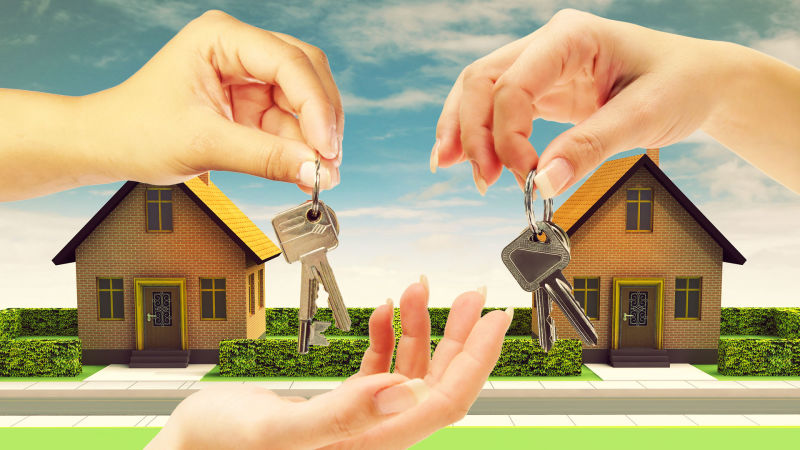

In [1]:
import IPython
IPython.display.Image('https://i-media.vyaparify.com/vcards/blogs/95898/Buysell1.jpg')

# Step 1: Import Libraries

In [2]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.datasets import fetch_california_housing
import IPython
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import MinMaxScaler #this is used for normalize the data
warnings.filterwarnings("ignore")


# Step 2 Load Data Create DF

In [3]:
# Internet Required For This Code to Run
data_dict = fetch_california_housing()

data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(data_dict['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
print(data_dict['target_names'])

['MedHouseVal']


In [6]:
df = pd.DataFrame(data_dict['data'],
                  columns = data_dict['feature_names'])

df['MedHouseVal'] = data_dict['target']


print('Data Loaded Successfully!!')

Data Loaded Successfully!!


# Step 3: Understanding Data using EDA

In [7]:
# Shape
df.shape

(20640, 9)

In [8]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
# Checking Null values
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
print(data_dict['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [11]:
# hundreds of thousands of dollars ($100,000) 1 lakh Dollars
# average number of household members
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
15185,4.1279,7.0,7.508299,1.59751,1134.0,2.352697,32.96,-117.1,1.676


In [12]:
# All data Must be in Numerical, Dataset contains all values in numerical
# We can proceed this for Analysis

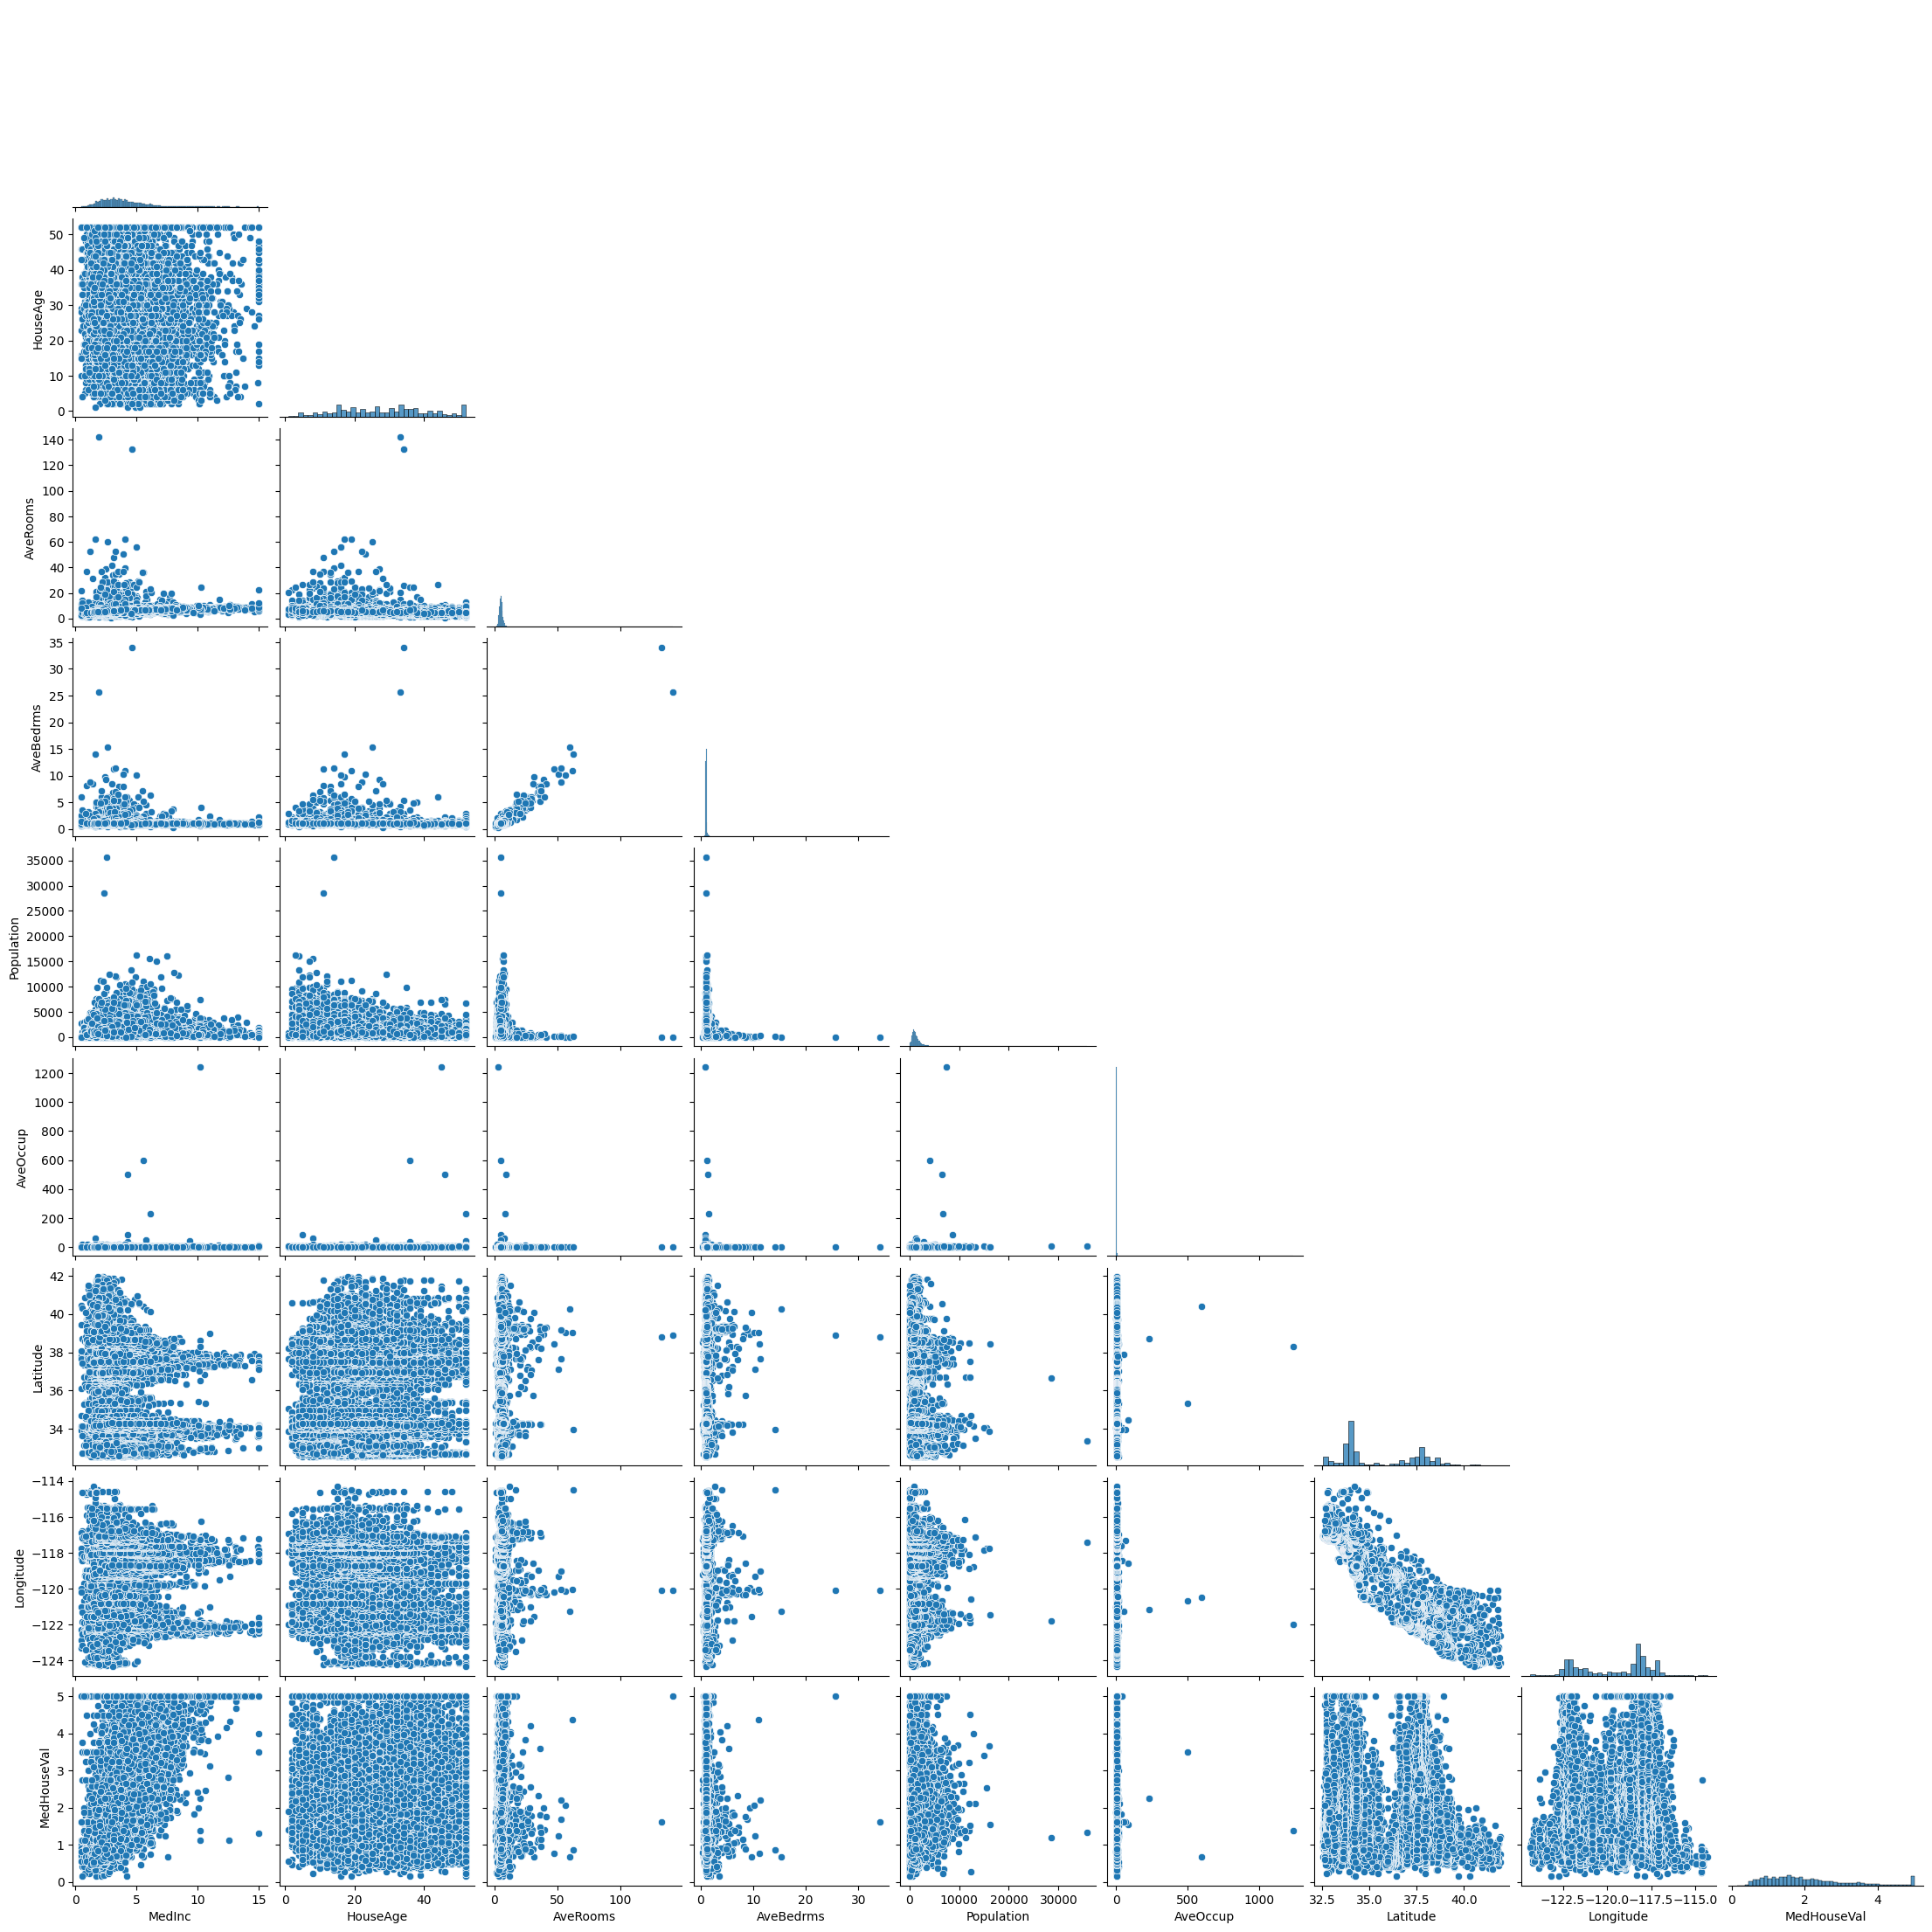

In [13]:
# Checking data Distribution

sns.pairplot(data = df,corner=True)
plt.show()

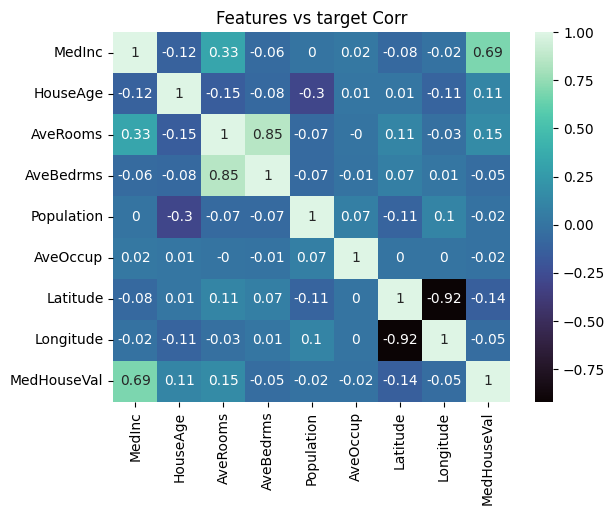

In [14]:
# Checking data Distribution

plt.title('Features vs target Corr')
sns.heatmap(df.corr().round(2), annot = True,cmap = 'mako')
# cmap = color_map ( -1 to 1)
plt.show()

In [15]:
# Data Describe()
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


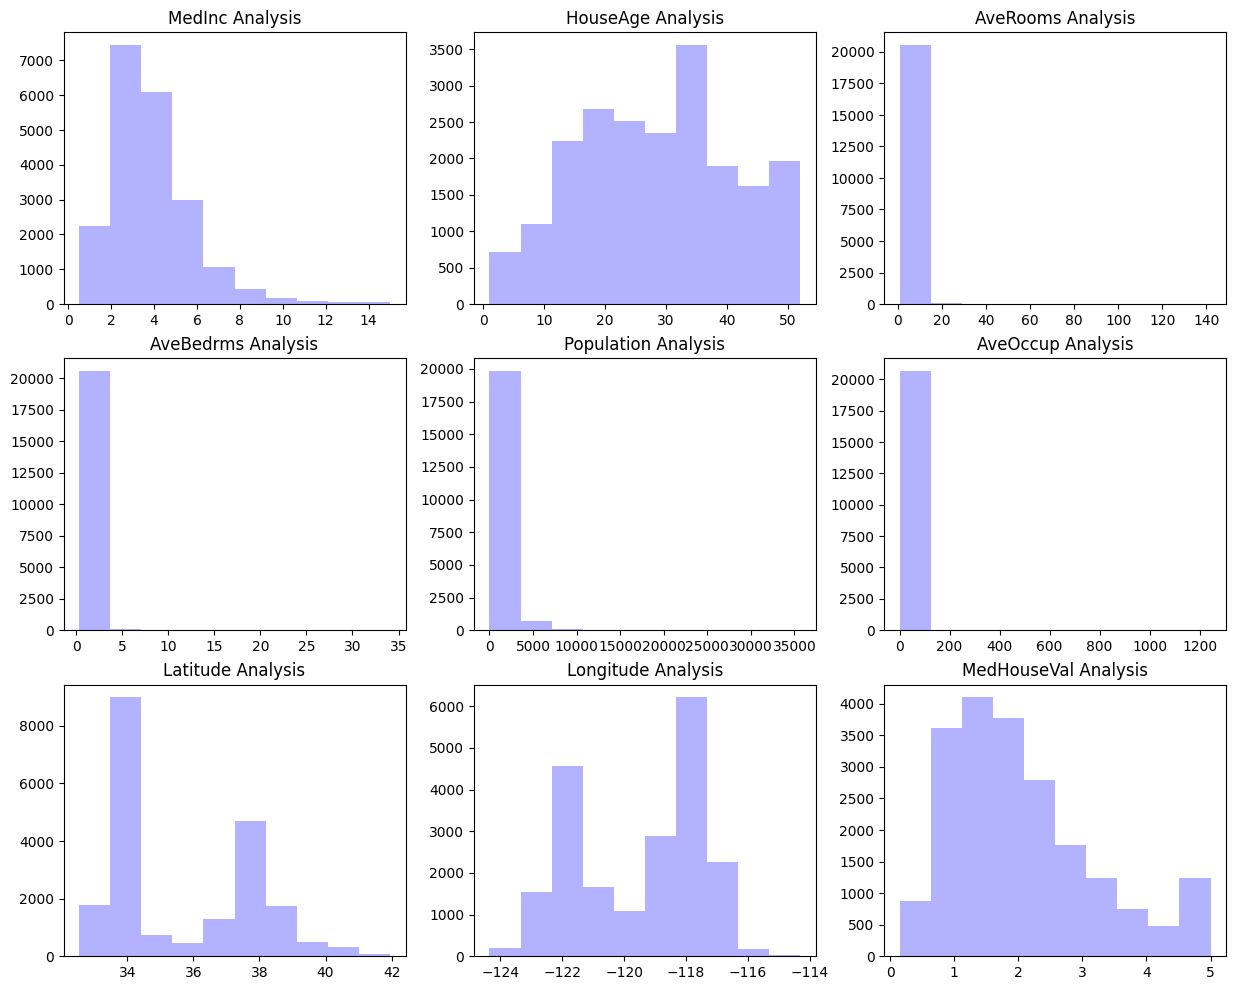

In [16]:
plt.figure(figsize = (15,12))
for i,j in enumerate(df.columns):
  plt.subplot(3,3, i+1)
  plt.hist(df[j],color = 'blue', alpha = 0.3)
  plt.title(j+' Analysis')
plt.show()

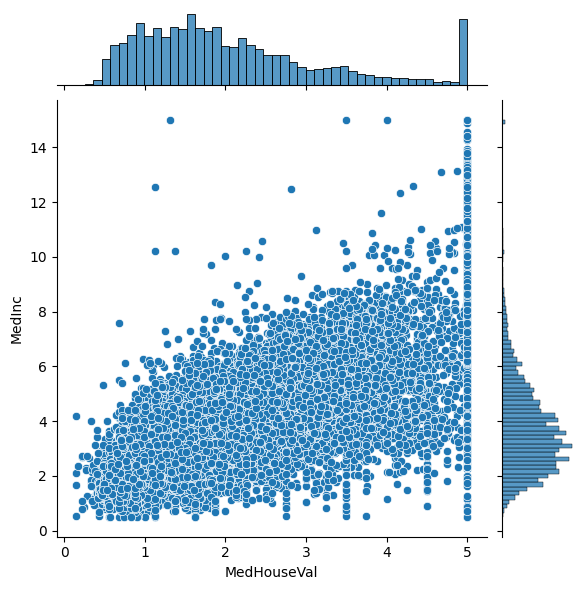

In [17]:
# Distribution of target Value MedHousevalue vs MedInc

sns.jointplot(data = df, x = 'MedHouseVal', y = 'MedInc')
plt.show()

In [18]:
# sns.regplot(data = df, x = 'MedHouseVal', y = 'MedInc')
# plt.show()

In [19]:
df['MedHouseVal'].describe()
# 75 % of price less than 2.64 lakh dollars

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

# Step 4: Feature Engineering and Preprocessing

In [20]:
# Convert data to Same Scale for better prediction
# normalization = MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


X = df.iloc[:,:-1]
y = df['MedHouseVal']



scaler = MinMaxScaler()

scaler.fit(X)  # Learning: Fit data in 0 to 1
X_scaled = scaler.transform(X)

print('Done')

Done


In [21]:
print(X_scaled.min())
print(X_scaled.max())

0.0
1.0000000000000002


# Step 5: Train test Split: Split Data for Training and testing Part

In [22]:
# Train test Split: Divide into train Part Test Part
# train_test_split: Func: divide


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=.2, random_state= 150 )
print('Done')

Done


In [23]:
b,a,c,d = [23,534,6,65] # Unpacking
print(a)

534


In [24]:
import random
random.seed(56)
random.randint(1,50)

36

In [25]:
print('Shape of Xtrain',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)


Shape of Xtrain (16512, 8)
Shape of X_test (4128, 8)
Shape of y_train (16512,)
Shape of y_test (4128,)


In [26]:
X_scaled.shape

(20640, 8)

In [27]:
20640*.8

16512.0

In [28]:
df.shape

(20640, 9)

# Step 6: Model Building

###### Step 6.1 Linear Model Using Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression() # Object Creation

lr_model.fit(X_train,y_train) # Trainig Model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


###### Step 6.1.2: Model prediction

In [30]:
# Test data: X_test

y_pred = lr_model.predict(X_test)
print('Done')

Done


In [31]:
# 20 %: Actual answer: y_test, Predcited: y_pred

lr_compare_df = pd.DataFrame({'Actual House price':y_test,
             'Predicted House price':y_pred})

print('Done')

Done


In [32]:
lr_compare_df

,Actual House price,Predicted House price
13569,0.93300,1.600182
6743,2.79900,2.290845
13230,3.92900,2.618237
18799,0.52000,0.209449
1052,1.23600,1.236397
...,...,...
19369,2.68800,2.276322
12808,0.69300,0.976300
6589,5.00001,3.410402
19719,0.71200,0.896588


In [33]:
lr_mae = mean_absolute_error(y_test,y_pred)
print('Lr MAE',lr_mae)

Lr MAE 0.5295622016018944


In [34]:
lr_mse = mean_squared_error(y_test,y_pred)
print('Lr MSE',lr_mse)

Lr MSE 0.5322170539831861


In [35]:
lr_rmse = lr_mse**.5

print('Lr RMSE',lr_rmse)

Lr RMSE 0.7295320787896761


In [36]:
# Trainig Score
lr_train_score = lr_model.score(X_train,y_train)
print('Training Score',lr_train_score)

# testing Score
lr_test_score = lr_model.score(X_test,y_test)
print('testing Score',lr_test_score)


Training Score 0.6081032361747607
testing Score 0.5984024263886711


In [37]:
# Model Score: apx: 60%, Model not that much good, we need, more parameter tuning
# Alternate Model call
# : feature vs Fetaure high corr( X col: 8)

# Variance Inflation Factor> 10 we can drop that col
# Bias vs Variance Trade off: Intersect

# Training score: High, Testing Score: Low = Overfit
# Training score: Low, Testing Score: Low  = Underfit
# Training score: Good, Testing Score: Good  = Balancedfit


# Principal Component Analysis (PCA) is a dimensionality reduction technique
# PCA:  Imp Features(cols) Find: (8: 5 Imp)

![alt text](testset.webp)

![testset.webp](attachment:54ad481d-491d-4654-92fd-4149bd3f5e13.webp)

In [38]:
# Lasso,Ridge :  Linear regression: Balanced fit model creation

![Bias_and_variance_contributing_to_total_error.svg.png](attachment:aae01608-98d4-4f30-8ab7-6a0512f687ff.png)

###### Step 6.1.3: checking VIF and Drop column if value vif>10

In [39]:
X_train_df = pd.DataFrame(X_train, columns = data_dict['feature_names'])
X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15645,0.130929,0.843137,0.021739,0.024416,0.033661,0.002259,0.166844,0.614542


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_df['intercept']  = 1

X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,intercept
13929,0.207218,0.333333,0.033947,0.021382,0.023908,0.001794,0.766206,0.248008,1


In [41]:
# X_train_df.shape[1]

In [42]:
# X_train_df.columns

In [43]:
# X_train_df.values

In [44]:
vif_df = pd.DataFrame()

vif_df['Features'] = list(data_dict['feature_names']) + ['Intercept']

vif_value = [variance_inflation_factor(X_train_df.values,i) for i in range(X_train_df.shape[1])]

vif_df['VIF factor'] = vif_value

vif_df.sort_values(by = 'VIF factor',ascending= False)

# Because Latitude and Longitude has high corr and vif close to 10 we can drop one or both

,Features,VIF factor
8,Intercept,177.876568
6,Latitude,9.316394
7,Longitude,8.977028
2,AveRooms,8.752272
3,AveBedrms,7.460090
0,MedInc,2.459841
1,HouseAge,1.240290
4,Population,1.136960
5,AveOccup,1.009297


In [45]:
# X is an independent features

In [46]:
# print(['Hello'+str(i) for i in range(10)])
# # Run loop inside list:

In [47]:
col = list(X.columns)
col.remove('Latitude')

# print(col)

X_train_vif = X_train_df[col]
X_train_vif.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
9060,0.296644,0.686275,0.036607,0.019405,0.038034,0.001645,0.61753


![variance-inflation-factor.asp-Final-6cd8e4740c254821b0fa2ab057b5df88.jpg](attachment:25d879c8-fab7-46d3-928a-5ed08c635c7f.jpg)

In [48]:
def built_model(ml_model, col):

    new_X_train = pd.DataFrame(X_train,columns = data_dict['feature_names'])
    final_X_train = new_X_train[col]

    new_X_test = pd.DataFrame(X_test,columns = data_dict['feature_names'])
    final_X_test = new_X_test[col]

    machine_model = ml_model()
    machine_model.fit(final_X_train,y_train)

    model_y_pred = machine_model.predict(final_X_test)

    model_train_score = machine_model.score(final_X_train,y_train)
    model_test_score = machine_model.score(final_X_test,y_test)

    model_mae_error = mean_absolute_error(y_test,model_y_pred)
    model_mse_error = mean_squared_error(y_test,model_y_pred)
    model_rmse_error = model_mse_error**.5
    model_r2_score = r2_score(y_test,model_y_pred)

    model_metrics = {'Model Training Score':model_train_score,
                    'Model Test Score':model_test_score,
                    'MAE Error':model_mae_error,
                    'MSE Error':model_mse_error,
                    'RMSE Error':model_rmse_error,
                    'R2 Score':model_r2_score}

    model_matrix = pd.DataFrame(model_metrics,index = [1])

    return model_matrix,machine_model



In [49]:
nl_model=LinearRegression
built_model(nl_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.543073,0.531162,0.570342,0.621327,0.788243,0.531162


In [50]:
nl_model=Lasso
built_model(nl_model,col)[0]
#lasso model fail here as we see the score it give is in negative 

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.0,-0.000009,0.904335,1.325262,1.1512,-0.000009


In [51]:
nl_model=Ridge
built_model(nl_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.52581,0.513927,0.59007,0.644168,0.802601,0.513927


In [52]:
print(col)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']


In [53]:
col=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [54]:
all_model=[LinearRegression,Ridge]
from sklearn.preprocessing import StandardScaler
#this module make mean value to zero
sc=StandardScaler()
sc_x=sc.fit_transform(X)
i=1
while True:
    X_train,X_test,y_train,y_test=train_test_split(sc_x,y,random_state=i,test_size=0.1)
    i+=1
    temp_df,final_model=built_model(Ridge,col)
    score=temp_df["Model Test Score"].values[0]
    print("Score is : ",score)
    if score>=0.6:
        print("best Random State",i)
        display(temp_df)
        display(final_model)
        break

    display(clear=True)

Score is :  0.6067450510265386
best Random State 178


,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.531671,0.606745,0.550302,0.556391,0.745916,0.606745


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [55]:
import pickle
with open("House_price_pred_ridge_model.pkl","wb")as f:
    pickle.dump(final_model,f)

with open("sc_scaler.pkl","wb")as f:
    pickle.dump(sc,f)
print ("File done")

File done


# **Step-8 Website Building and local host deployment**

In [56]:
#ML Model :client:
#website : Input value: Prediction
# Website : Python: Django,flask,fastapi,: streamlit
#streamlit : Python Web-based,framework,fast ML Model Test Wesbite
# Streamlit = Devlpoment + Deployment(For ML Engineers)

In [57]:
import streamlit as st

In [58]:
# ! : Represents run this code in terminal.

In [59]:
os.getcwd()

'c:\\Users\\divya\\OneDrive\\Desktop\\datascience1\\project'

In [60]:
col

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [61]:
df.to_csv("California.csv") #this make our data and save as a csv file 

In [62]:
for i in df[col]:
    min_Value,max_value=df[i].agg(['min','max'])
    print(f'''House {i} min value : {min_Value}
House {i} max value : {max_value}''')

House MedInc min value : 0.4999
House MedInc max value : 15.0001
House HouseAge min value : 1.0
House HouseAge max value : 52.0
House AveRooms min value : 0.8461538461538461
House AveRooms max value : 141.9090909090909
House AveBedrms min value : 0.3333333333333333
House AveBedrms max value : 34.06666666666667
House Population min value : 3.0
House Population max value : 35682.0
House AveOccup min value : 0.6923076923076923
House AveOccup max value : 1243.3333333333333


In [63]:
# temp1_df=pd.read_csv("California.csv")
# for i in df[col]:
#     min_Value,max_value=df[i].agg(['min','max'])

# **Step - 9 Live deployment using Streamlit**

In [64]:
#Modules required to deployment

# import streamlit as st
# import pandas as pd
# import random
# from sklearn.preprocessing import StandardScaler
# import pickle
# import warnings
# import time

In [ ]:
#Github : Folder Housing Price Project
#requirements.txt = we will write those modules which is important for app.oy to run